In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv('Jaipur_Rainfall_Data.csv')

#get Hour columns for use in analysis
hour_cols = list(pd.to_numeric(df.columns, errors = 'coerce').dropna().astype(int))
hour_cols = list(map(str, hour_cols))

#convert month string to month number
map_month = dict((v.upper(),k) for k,v in enumerate(calendar.month_abbr)) #mapping for months
df['MONTH'] = df['MONTH'].map(map_month)

#Convert Year Month Date to DATETIME
df['DATETIME'] = pd.to_datetime((df.YEAR*10000+df.MONTH*100+df.DAY).apply(str),format='%Y%m%d')

#convert hour column to unpivot table
df = pd.melt(df, id_vars=['DATETIME'], value_vars=hour_cols)

#Add Hour to time
df['DATETIME'] =  df['DATETIME'] + pd.TimedeltaIndex((df.variable.astype(float) - 1), 'H')
df = df.drop(columns=['variable'])
df.columns = ['DATETIME', 'RAINFALL']
df['RAINFALL'] =  pd.to_numeric(df['RAINFALL'], errors='coerce')

#Recover recoverable data by month mean
df = df.fillna(df.groupby(df['DATETIME'].dt.month).transform('mean'))

#Remove Bad Missing data year
#df = df[df['DATETIME'].dt.year == 2011].reset_index(drop=True) #2011 has missing data for monsoon season
df.index = df['DATETIME']

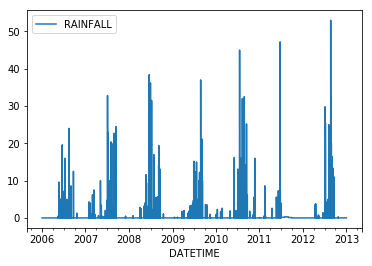

In [5]:
df.resample('h').sum().plot(kind='line')

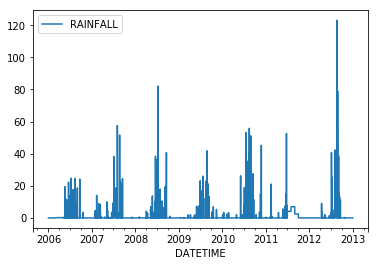

In [6]:
df.resample('d').sum().plot(kind='line')

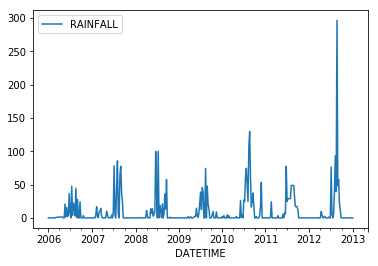

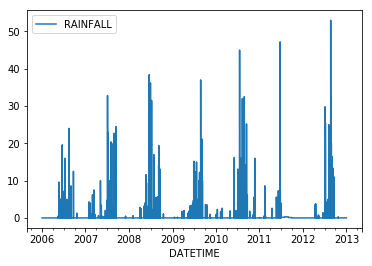

In [10]:
df.resample('w').sum().plot(kind='line')

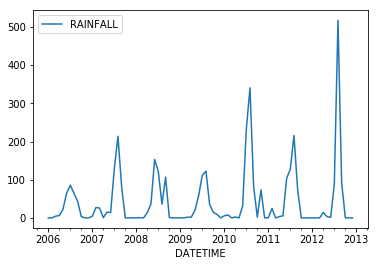

In [8]:
df.resample('M').sum().plot(kind='line')

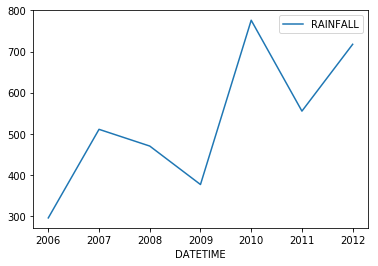

In [9]:
df.resample('Y').sum().plot(kind='line')

In [390]:
df.resample('M').sum()

,RAINFALL
DATETIME,
2006-12-31,295.258093
2007-12-31,510.748603
2008-12-31,470.051189
2009-12-31,376.500000
2010-12-31,776.100000
2011-12-31,555.070462
2012-12-31,717.600000


In [381]:
df.resample('Y').sum()

,RAINFALL
DATETIME,
2006-12-31,295.258093
2007-12-31,510.748603
2008-12-31,470.051189
2009-12-31,376.500000
2010-12-31,776.100000
2011-12-31,555.070462
2012-12-31,717.600000


In [397]:
df.groupby(df['DATETIME'].dt.month).sum()

,RAINFALL
DATETIME,
1,10.700000
2,60.900000
3,32.433333
4,42.583333
5,104.100000
6,426.218447
7,894.686529
8,1510.600000
9,514.206704
